In [208]:
import numpy as np
import pandas as pd

In [244]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from '/home/jupyter/thesis/classification_modules.py'>

In [223]:
# set configuration
num_t_steps = 30
step_size = 0.1 * np.pi
t = np.arange(1, num_t_steps+1) * step_size

# classificatiom
test_size, cv = 0.2, 5
cv_config = [test_size, cv]

In [211]:
# reading data
train_data = pd.read_csv('graphwave_ac_train.csv')
test_data = pd.read_csv('graphwave_ac_test.csv')

In [224]:
ecf_df = dem.get_ecf(train_data, t)
ecf_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,label
0,0.999995,0.999980,0.999955,0.999921,0.999877,0.999823,0.999760,0.999688,0.999607,0.999517,...,0.004313,0.004435,0.004548,0.004653,0.004750,0.004838,0.004918,0.004989,0.005052,B5_0
1,0.999996,0.999983,0.999962,0.999932,0.999894,0.999848,0.999794,0.999732,0.999662,0.999585,...,0.003359,0.003446,0.003525,0.003596,0.003659,0.003715,0.003762,0.003802,0.003835,B5_0
2,0.999995,0.999981,0.999958,0.999925,0.999884,0.999833,0.999774,0.999706,0.999629,0.999544,...,0.003817,0.003919,0.004012,0.004097,0.004174,0.004243,0.004303,0.004355,0.004399,B5_0


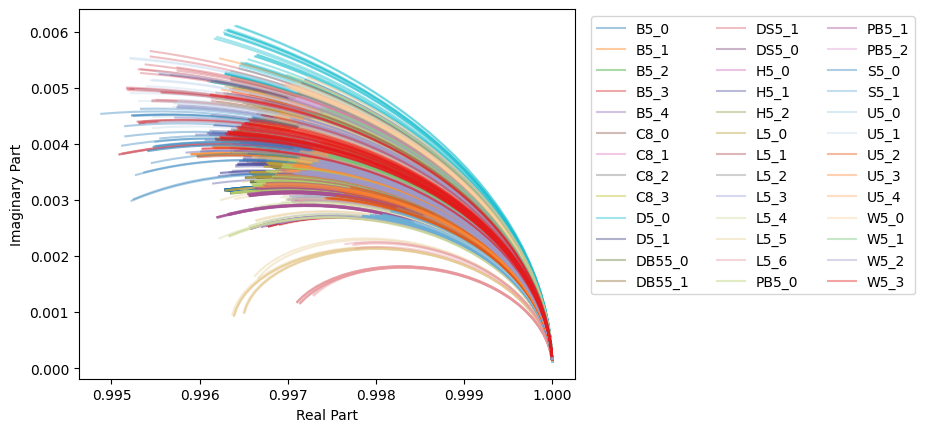

In [225]:
dem.get_ecf_plot(ecf_df,t)

In [228]:
num_steps_list = np.arange(1,21)
step_size_list = [ i * np.pi for i in [0.05, 0.25, 0.5, 1, 1.5, 2, 3]]

In [248]:
res_svm = cm.cv_ecf(num_steps_list, step_size_list, test_data, train_data, cv_config, 1)

  0%|          | 0/20 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [246]:
res_lr = cm.cv_ecf(num_steps_list, step_size_list, test_data, train_data, cv_config, 2)

  0%|          | 0/20 [00:00<?, ?it/s]

In [247]:
res_lr

,num_steps,step_size,f1,std,cost,gamma,alpha
0,1,0.15708,0.028756,0.00397,0,0,42.919343
1,1,0.785398,0.028715,0.00402,0,0,42.919343
2,1,1.570796,0.028838,0.004149,0,0,42.919343
3,1,3.141593,0.027667,0.004238,0,0,42.919343
4,1,4.712389,0.025458,0.005262,0,0,42.919343
...,...,...,...,...,...,...,...
135,20,1.570796,0.229552,0.013251,0,0,1.0
136,20,3.141593,0.441015,0.028387,0,0,1.0
137,20,4.712389,0.534244,0.010886,0,0,1.0
138,20,6.283185,0.566599,0.028981,0,0,1.0


In [ ]:
num_steps_list = np.arange(2,10,2)
step_size_list = np.arange(0,2,0.1)*np.pi